<a href="https://colab.research.google.com/github/yumi-jun/Data_Analysis/blob/main/%EC%9E%90%EA%B8%B0_%EC%A7%80%EB%8F%84%ED%99%94_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자기 조직화 학습




In [ ]:
pip install minisom

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv('Credit_Card_Applications.csv')
print(dataset.shape)
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print(x.shape)

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
x=sc.fit_transform(x)

from minisom import MiniSom
# 10 * 10 개 2차원 지도를 생성 , 학습률 : 모델이 학습 하는 속도와 안정성을 제어하는 역할
# 학습률이 크면 : 가중치가 더 크게 변하고 -> 학습 속도 느려질 수 있음, 손실 함수의 미세한 최솟값 찾는데 유리
# 학습률이 작으면 : 가중치가 더 작게 변한다. -> 학습 속도 빠름, 손실 함수의 최솟값을 지나칠 수 있음.
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
# som 의 가중치를 무작위로 초기화
som.random_weights_init(x)
# som 훈련, 랜덤한 데이터로 100번의 훈련을 수행 => 각 노드의 최적의 BMU 를 찾는다!
som.train_random(data=x,num_iteration=100)



(690, 16)
(690, 15)


In [ ]:
dataset.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


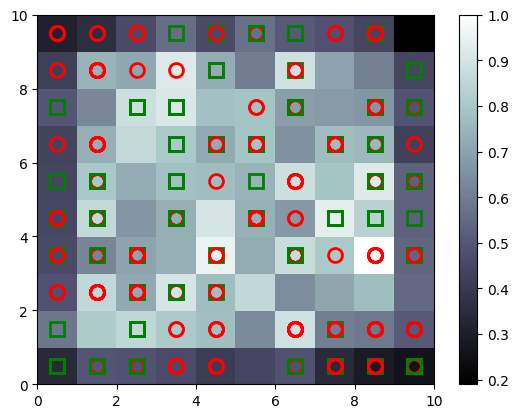

In [ ]:
# mid 는, 각 노드의 중간 값을 나타낸다.
from pylab import bone, pcolor, colorbar, plot , show
bone()
# distance_map () 은, 각 노드와 이웃 노드들 간의 평균 거리를 계산하여 반환한다.
# 거리값이 클수록, 그 노드는 데이터 공간에서 고립된 것으로, 이를 시각화하면 -> 고립된 노드, 즉 잠재적 이상치로 쉽게 찾을 수 있다.
pcolor(som.distance_map().T)
colorbar()
#  동그라미 , 와 상자
markers=['o','s']
# 빨간색은, 승인 받지 못함. 초록색은, 승인 받음
colors = ['r','g']
print(x)
# i는 고객 데이터의 인덱스, x 는 고객 데이터의 벡터값.
for i, r in enumerate(x):
    w = som.winner(r)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()
# 각 위닝 노드를 보면, 통과한 고객과 통과하지 못한 고객이 같이 존재함을 알 수 있다.
# 이 지도를 통해 잠재적 사기꾼의 목록을 만들어야 한다.

In [ ]:
# 우리가 식별한 아웃라이어 위닝 노드를 가져와, 잠재적 사기군의 전체 목록을 볼 수 있다.
import numpy as np
# 위닝 노드와 고객 명단을 가져옴
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(7,1)], mappings[(2,1)]),axis=0)
print(frauds.shape)
frauds=sc.inverse_transform(frauds)
print(frauds)


(11, 15)
[[1.5762799e+07 1.0000000e+00 3.0670000e+01 2.5000000e+00 2.0000000e+00
  1.3000000e+01 8.0000000e+00 2.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 3.4000000e+02 1.0000000e+00]
 [1.5763194e+07 1.0000000e+00 2.2670000e+01 1.6500000e-01 2.0000000e+00
  8.0000000e+00 3.0000000e+00 2.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5740411e+07 1.0000000e+00 4.0580000e+01 3.2900000e+00 2.0000000e+00
  7.0000000e+00 4.0000000e+00 3.5000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 4.0000000e+02 1.0000000e+00]
 [1.5809909e+07 1.0000000e+00 3.0580000e+01 2.7100000e+00 1.0000000e+00
  7.0000000e+00 4.0000000e+00 1.2500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 8.0000000e+01 1.0000000e+00]
 [1.5790689e+07 1.0000000e+00 2.1170000e+01 0.0000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 5.0000000e-01 0.00000